<a href="https://colab.research.google.com/github/amanoese/study_keras_for_colaboratory/blob/master/study_keras_for_news_category_label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 4s 468us/step - loss: 2.6200 - acc: 0.4912 - val_loss: 1.6854 - val_acc: 0.6090
Epoch 2/10
7982/7982 [==============================] - 1s 140us/step - loss: 1.4434 - acc: 0.6845 - val_loss: 1.3127 - val_acc: 0.6830
Epoch 3/10
7982/7982 [==============================] - 1s 141us/step - loss: 1.0872 - acc: 0.7620 - val_loss: 1.1317 - val_acc: 0.7420
Epoch 4/10
7982/7982 [==============================] - 1s 140us/step - loss: 0.8664 - acc: 0.8066 - val_loss: 1.0446 - val_acc: 0.7730
Epoch 5/10
7982/7982 [==============================] - 1s 140us/step - loss: 0.6866 - acc: 0.8495 - val_loss: 0.9867 - val_acc: 0.7890
Epoch 6/10
7982/7982 [==============================] - 1s 140us/step - loss: 0.5545 - acc: 0.8755 - val_loss: 0.9587 - val_acc: 0.7910
Epoch 7/10
7982/7982 [==============================] - 1s 169us/step - loss: 0.4492 - acc: 0.8988 - val_loss: 0.9462 - val_acc: 0.8030


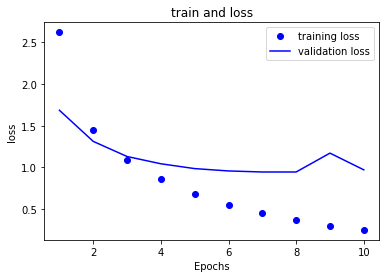

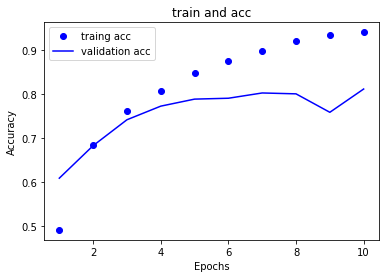

In [61]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt


(train_data,train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])


# index 0 is defined padding
# index 1 is defined sequence start code
# index 2 is defined unknown word
decoded_newswire = ' '.join([reverse_word_index.get(i - 3,'?') for i in train_data[0]])

# one-hot
def vectorize_sequences(sequences, dimensions=10000):
  results = np.zeros((len(sequences),dimensions))
  
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val,y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoches = range(1,len(loss_values) + 1)

plt.plot(epoches,loss_values, 'bo',label='training loss')
plt.plot(epoches,val_loss_values, 'b',label='validation loss')

plt.title('train and loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epoches,acc, 'bo',label='traing acc')
plt.plot(epoches,val_acc, 'b',label='validation acc')

plt.title('train and acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [2]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt


(train_data,train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])


# index 0 is defined padding
# index 1 is defined sequence start code
# index 2 is defined unknown word
decoded_newswire = ' '.join([reverse_word_index.get(i - 3,'?') for i in train_data[0]])

# one-hot
def vectorize_sequences(sequences, dimensions=10000):
  results = np.zeros((len(sequences),dimensions))
  
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(partial_x_train,partial_y_train,epochs=8,batch_size=512,validation_data=(x_val,y_val))

results = model.evaluate(x_test,one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 160us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/8
7982/7982 [==============================] - 1s 139us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/8
7982/7982 [==============================] - 1s 138us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/8
7982/7982 [==============================] - 1s 140us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/8
7982/7982 [==============================] - 1s 138us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/8
7982/7982 [==============================] - 1s 139us/step - loss: 0.5665 - acc: 0.8801 - val_loss: 0.9412 - val_acc: 0.8040
Epoch 7/8
7982/7982 [==============================] - 1s 137us/step - loss: 0.4581 - acc: 0.9045 - val_loss: 0.9079 - val_acc: 0.8010
Epoch 8

[0.9957183734285757, 0.7778272484947504]

[ 3  4  3 ... 25  3 25]
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 226us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 142us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 143us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 143us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 143us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0

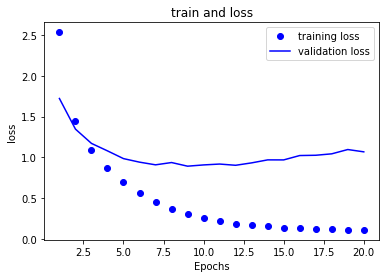

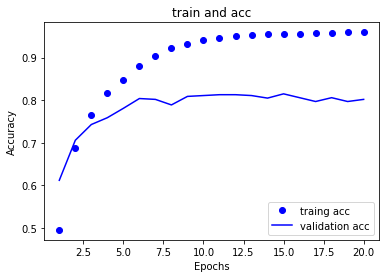

In [28]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt


(train_data,train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])


# index 0 is defined padding
# index 1 is defined sequence start code
# index 2 is defined unknown word
decoded_newswire = ' '.join([reverse_word_index.get(i - 3,'?') for i in train_data[0]])

# one-hot
def vectorize_sequences(sequences, dimensions=10000):
  results = np.zeros((len(sequences),dimensions))
  
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

_train_labels = np.array(train_labels)
_test_labels = np.array(test_labels)

print(_train_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = _train_labels[:1000]
partial_y_train = _train_labels[1000:]

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoches = range(1,len(loss_values) + 1)

plt.plot(epoches,loss_values, 'bo',label='training loss')
plt.plot(epoches,val_loss_values, 'b',label='validation loss')

plt.title('train and loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epoches,acc, 'bo',label='traing acc')
plt.plot(epoches,val_acc, 'b',label='validation acc')

plt.title('train and acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()